<a href="https://colab.research.google.com/github/KomalMano/Story/blob/master/14_Stochastic_Gradient_Descent_vs_Batch_Gradient_Descent_vs_Mini_Batch_Gradient_Descent_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from google.colab import files
import seaborn as sn
import io

In [3]:
uploaded = files.upload()

Saving 14.Stochastic Gradient Descent vs Batch Gradient Descent vs Mini Batch Gradient Descent_DL.csv to 14.Stochastic Gradient Descent vs Batch Gradient Descent vs Mini Batch Gradient Descent_DL.csv


In [4]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "14.Stochastic Gradient Descent vs Batch Gradient Descent vs Mini Batch Gradient Descent_DL.csv" with length 250 bytes


In [5]:
uploaded

{'14.Stochastic Gradient Descent vs Batch Gradient Descent vs Mini Batch Gradient Descent_DL.csv': b'area,bedrooms,price\r\n1056,2,39.07\r\n2600,4,120\r\n1440,3,62\r\n1521,3,75\r\n1200,2,51\r\n1170,2,38\r\n2732,4,135\r\n3300,4,155\r\n1310,3,50\r\n3700,5,167\r\n1800,3,82\r\n2785,4,140\r\n1000,2,38\r\n1100,2,40\r\n2250,3,101\r\n1175,2,42\r\n1180,3,48\r\n1540,3,60\r\n2770,3,102\r\n800,1,32\r\n'}

In [6]:
df = pd.read_csv(io.StringIO(uploaded['14.Stochastic Gradient Descent vs Batch Gradient Descent vs Mini Batch Gradient Descent_DL.csv'].decode('utf-8')))
df.sample(5)
#here u can see that the scale here is much of area as compare to scale of bedrooms
#So 1st we r going to scaling

,area,bedrooms,price
3,1521,3,75.0
11,2785,4,140.0
4,1200,2,51.0
16,1180,3,48.0
8,1310,3,50.0


In [7]:
#So when we scaling the ML model perform great
#So implement the SDG and then implementing BGD in plane python
#So plane python means min max scaling 
#So use min max scaling import sklearn preprocessing
from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price',axis='columns'))
scaled_X
#it bring them the scaling from 0 to 1

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [8]:
#let's do the same thing with y
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))
scaled_y
#my x and y both are scaled now

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [9]:
np.ones(shape=(2))

array([1., 1.])

In [10]:
w = np.zeros(shape=(2))

In [11]:
scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [12]:
scaled_X.T

array([[0.08827586, 0.62068966, 0.22068966, 0.24862069, 0.13793103,
        0.12758621, 0.6662069 , 0.86206897, 0.17586207, 1.        ,
        0.34482759, 0.68448276, 0.06896552, 0.10344828, 0.5       ,
        0.12931034, 0.13103448, 0.25517241, 0.67931034, 0.        ],
       [0.25      , 0.75      , 0.5       , 0.5       , 0.25      ,
        0.25      , 0.75      , 0.75      , 0.5       , 1.        ,
        0.5       , 0.75      , 0.25      , 0.25      , 0.5       ,
        0.25      , 0.5       , 0.5       , 0.5       , 0.        ]])

In [13]:
np.dot(w, scaled_X.T)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [14]:
#example
a = np.array([1,2,3])
b = np.array([10,5,7])
a-b

array([-9, -3, -4])

In [15]:
np.mean(np.square(a-b))

35.333333333333336

In [16]:
#now next step to implement the BGD
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):

  number_of_features = X.shape[1]

  w = np.ones(shape=(number_of_features))  #array([1., 1.]) w1 and w2
  b = 0
  total_samples = X.shape[0]

  cost_list = []
  epoch_list = []

  for i in range(epochs):
    y_predicted = np.dot(w, scaled_X.T) + b ## w1 * area + w2 * bedrooms #area and the bedrooms are comes from the x w1 is from
    #u can exact theat computation by using dot product b/w w and the x transpose now why i do that x transpose.
    #np.dot(w, scaled_X.T) represents this area and bedroom eq.
    #also apply a vector operation Bcz its too much fast . While in the for loop its too much slow.

    w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
    b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)

    w = w - learning_rate * w_grad
    b = b - learning_rate * b_grad

    cost = np.mean(np.square(y_true-y_predicted)) #mean means its a Mean square error

#record cost and epoch lis
    if i%10==0:
      cost_list.append(cost)
      epoch_list.append(i)
  return w, b, cost, cost_list, epoch_list

#after return then calling the function and print those values

w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),500)
w,b,cost


(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

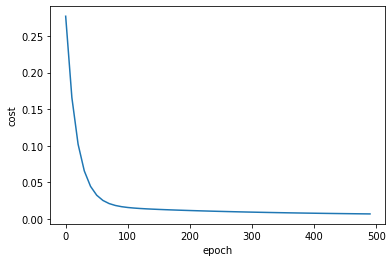

In [17]:
#now let me plot the chat of my cost reduces with every epoch
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [18]:
sx.transform([[2600,4]])

array([[0.62068966, 0.75      ]])

In [19]:
w

array([0.70712464, 0.67456527])

In [20]:
sy.inverse_transform([[1, 0]])#1 is max value and 0 is min value

array([[167.,  32.]])

In [21]:
#now actually write my prediction function
def predict(area,bedrooms,w,b):
  scaled_X = sx.transform([[area,bedrooms]])[0]
  
  scaled_price = w[0]*scaled_X[0] +w[1]*scaled_X[1] +b #now scaled the price and then reverse the transform
  return sy.inverse_transform([[scaled_price]])[0][0] # then get the real price 

predict(2600,4,w,b)
#my ans is predicted is actally good

128.45484403267596

In [22]:
#now lets predict again
predict(1000,2,w,b)

30.253094462442355

In [23]:
predict(1500,3,w,b)
#Its a BGD

69.47860785714694

In [24]:
import random
random.randint(0,6)

2

In [29]:
#Now lets Start a SGD
def sochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
  number_of_features = X.shape[1]
  w = np.ones(shape=(number_of_features))
  b = 0
  total_samples = X.shape[0]

  cost_list = []
  epoch_list = []

  for i in range(epochs):
    #in every sample we use picked randomly sample
    random_index = random.randint(0,total_samples-1)
    sample_x = X[random_index]
    sample_y = y_true[random_index]
    y_predicted = np.dot(w, sample_x.T) + b

    w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
    b_grad = -(2/total_samples)*(sample_y-y_predicted) #we r not using sum bcz we r dealing with 1 sample

    w = w - learning_rate * w_grad
    b = b - learning_rate * b_grad

    cost = np.square(sample_y-y_predicted) #mean means its a Mean square error

#record cost and epoch lis
    if i%100==0:
      cost_list.append(cost)
      epoch_list.append(i)
  return w, b, cost, cost_list, epoch_list
    
w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = sochastic_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),10000)
w_sgd, b_sgd, cost_sgd


(array([0.70740057, 0.6730826 ]), -0.22789115451194866, 0.00687748175756273)

In [32]:
#now let me compare it with my values
w,b,cost
#So the values are quit same. I use different epoch.
#in SGD we r not going all epoch we r going randomly 1 epoch

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

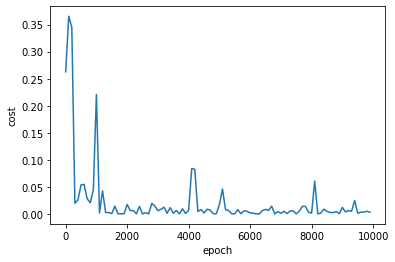

In [34]:
#now let me plot SGD
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)
#u see the chart , it looks like a zig zag

In [36]:
#if u use the prediction
predict(2600,4,w_sgd,b_sgd)
#u r notice the value are quit similarl to the actual value.

128.65959685521082

In [37]:
predict(1500, 3,w_sgd,b_sgd)

69.71927122691253